In [19]:
#Bộ dữ liệu đang được sử dụng cho Dự báo lưu lượng truy cập trang web.
#được thu thập từ dữ liệu lưu lượng truy cập hàng ngày của thecleverprogrammer.com. 
#Nó chứa dữ liệu về dữ liệu lưu lượng truy cập hàng ngày từ tháng 6 năm 2021 đến tháng 6 năm 2022.

#import thư viện pandas.
import pandas as pd 

#import thư viện matplotlib.
import matplotlib.pyplot as plt 

#import thư viện plotly.express dùng để vẽ biểu đồ phân tán.
import plotly.express as px 

import plotly.graph_objects as go

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima_model import ARIMA

import statsmodels.api as sm

data = pd.read_csv("Thecleverprogrammer.csv")
print(data.head())


         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [20]:
#Tập dữ liệu chứa hai cột, ngày và lưu lượng truy cập. 
#Chuyển đổi cột Ngày thành kiểu dữ liệu Ngày giờ.
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


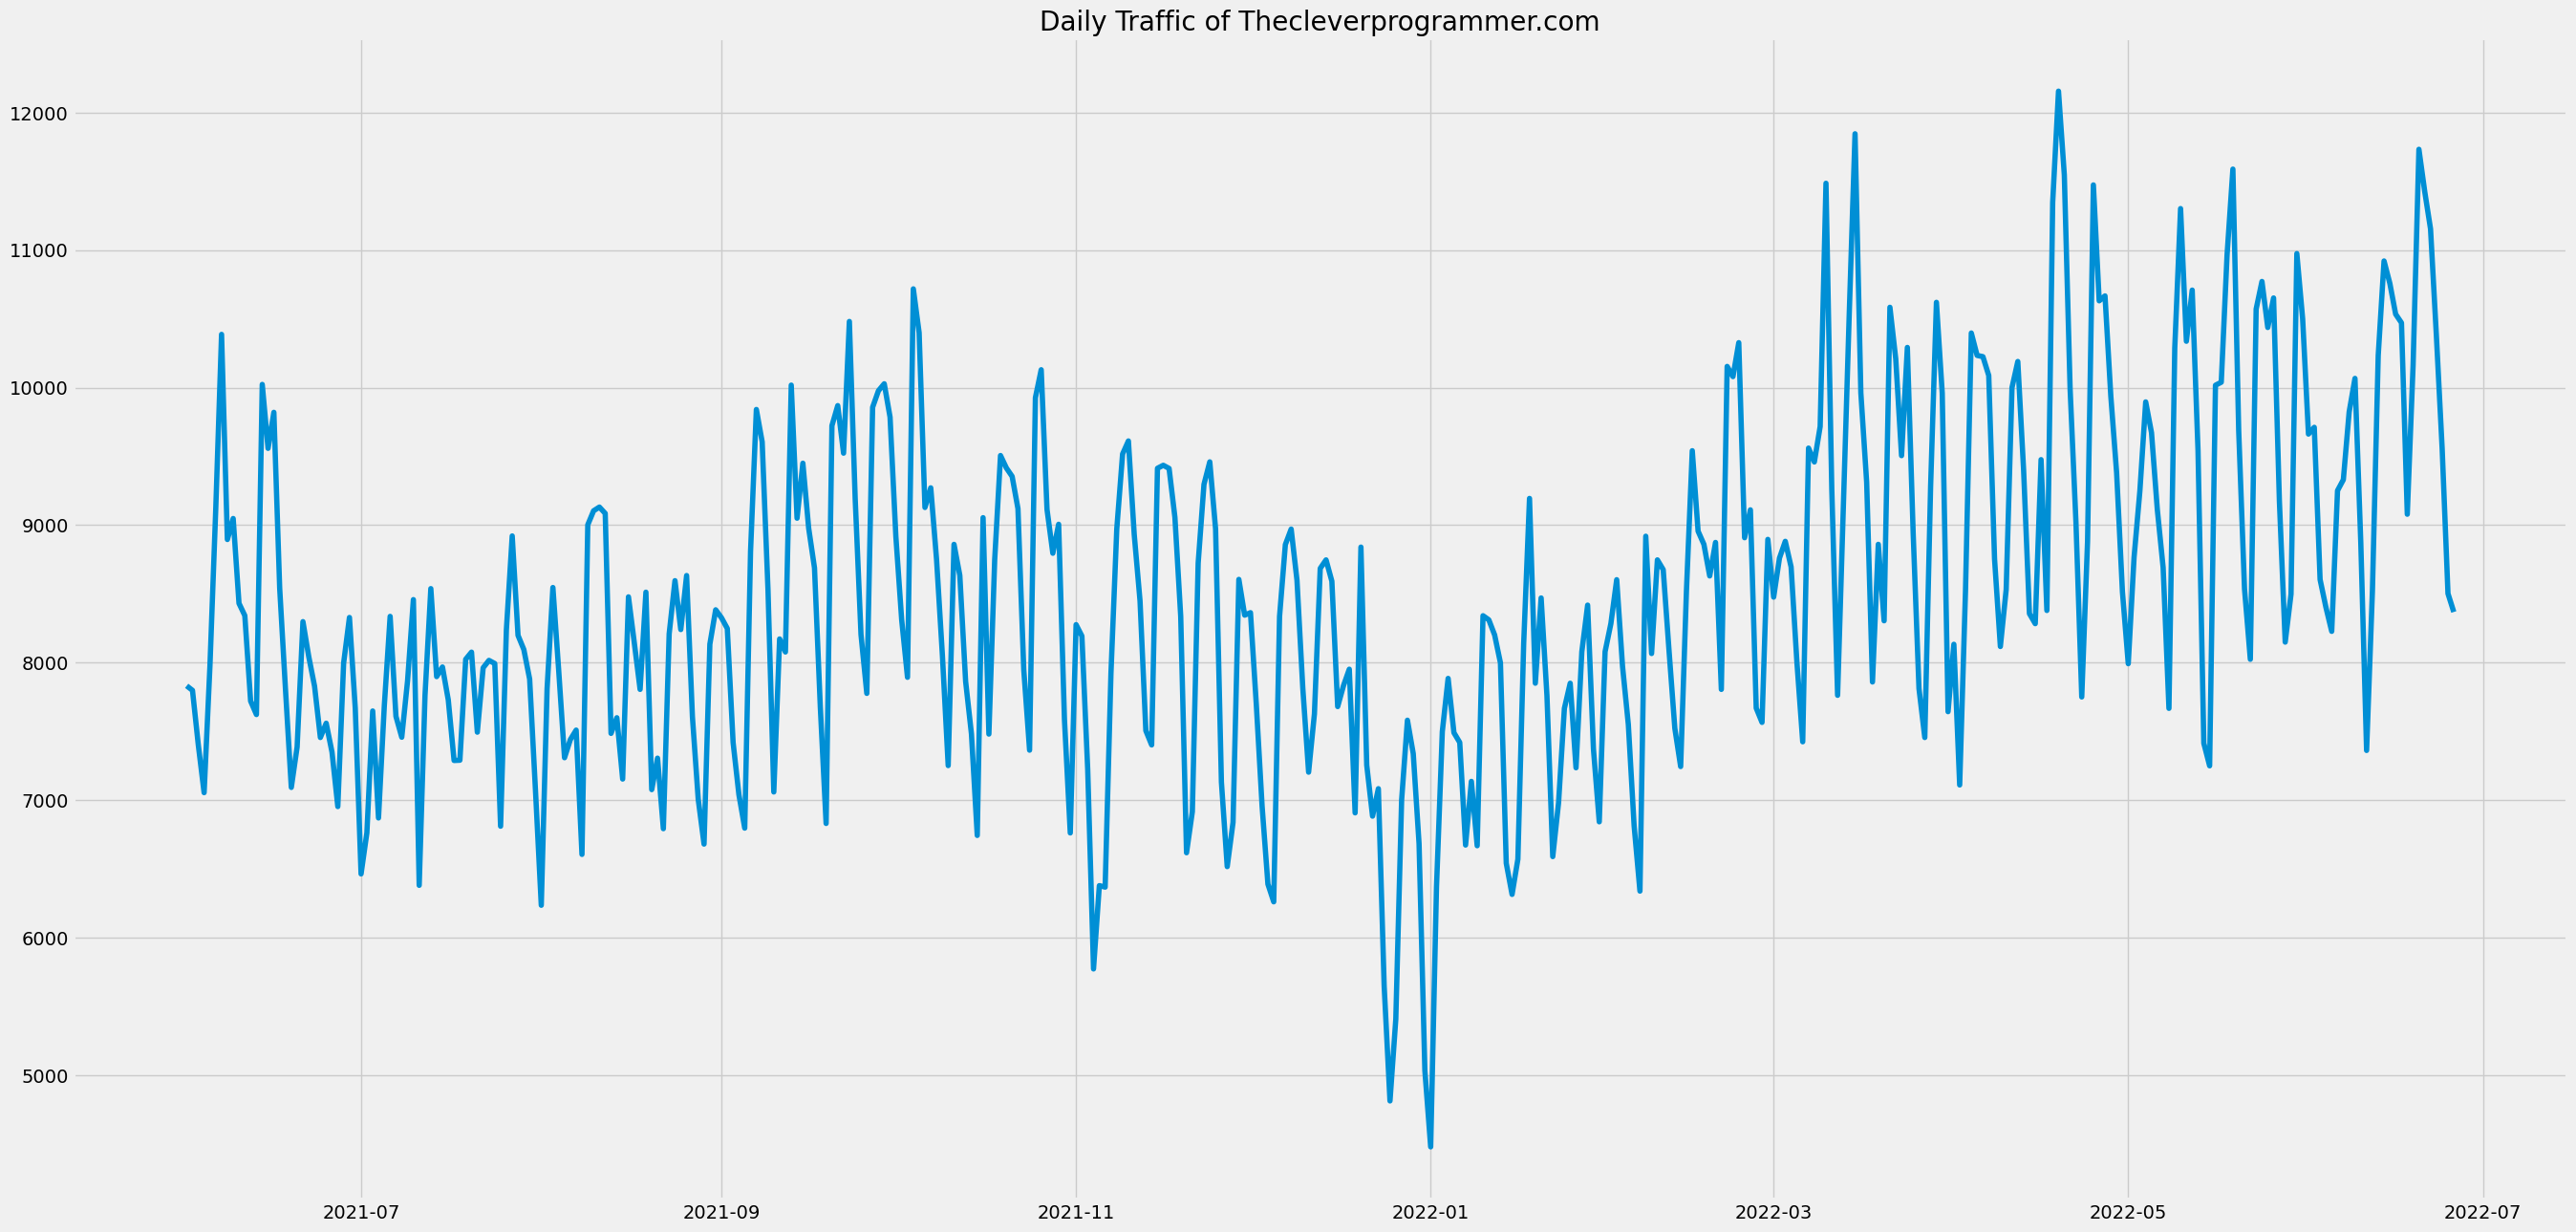

In [66]:
#Cột Ngày giờ ban đầu là một đối tượng, vì vậy đã chuyển đổi nó thành cột Ngày giờ.
#Xuất ra lưu lượng truy cập hàng ngày của trang web:

plt.style.use('fivethirtyeight')

#Kích thước biểu đồ
plt.figure(figsize=(30, 15))

plt.plot(data["Date"], data["Views"]) ##Cột dọc là số lượng truy cập, cột ngang là khoảng thời gian từ 06/2021 đến 06/2022

#Tiêu đề
plt.title("Daily Traffic of Thecleverprogrammer.com")

#Xuất ra biểu đồ
plt.show()

<Figure size 640x480 with 0 Axes>

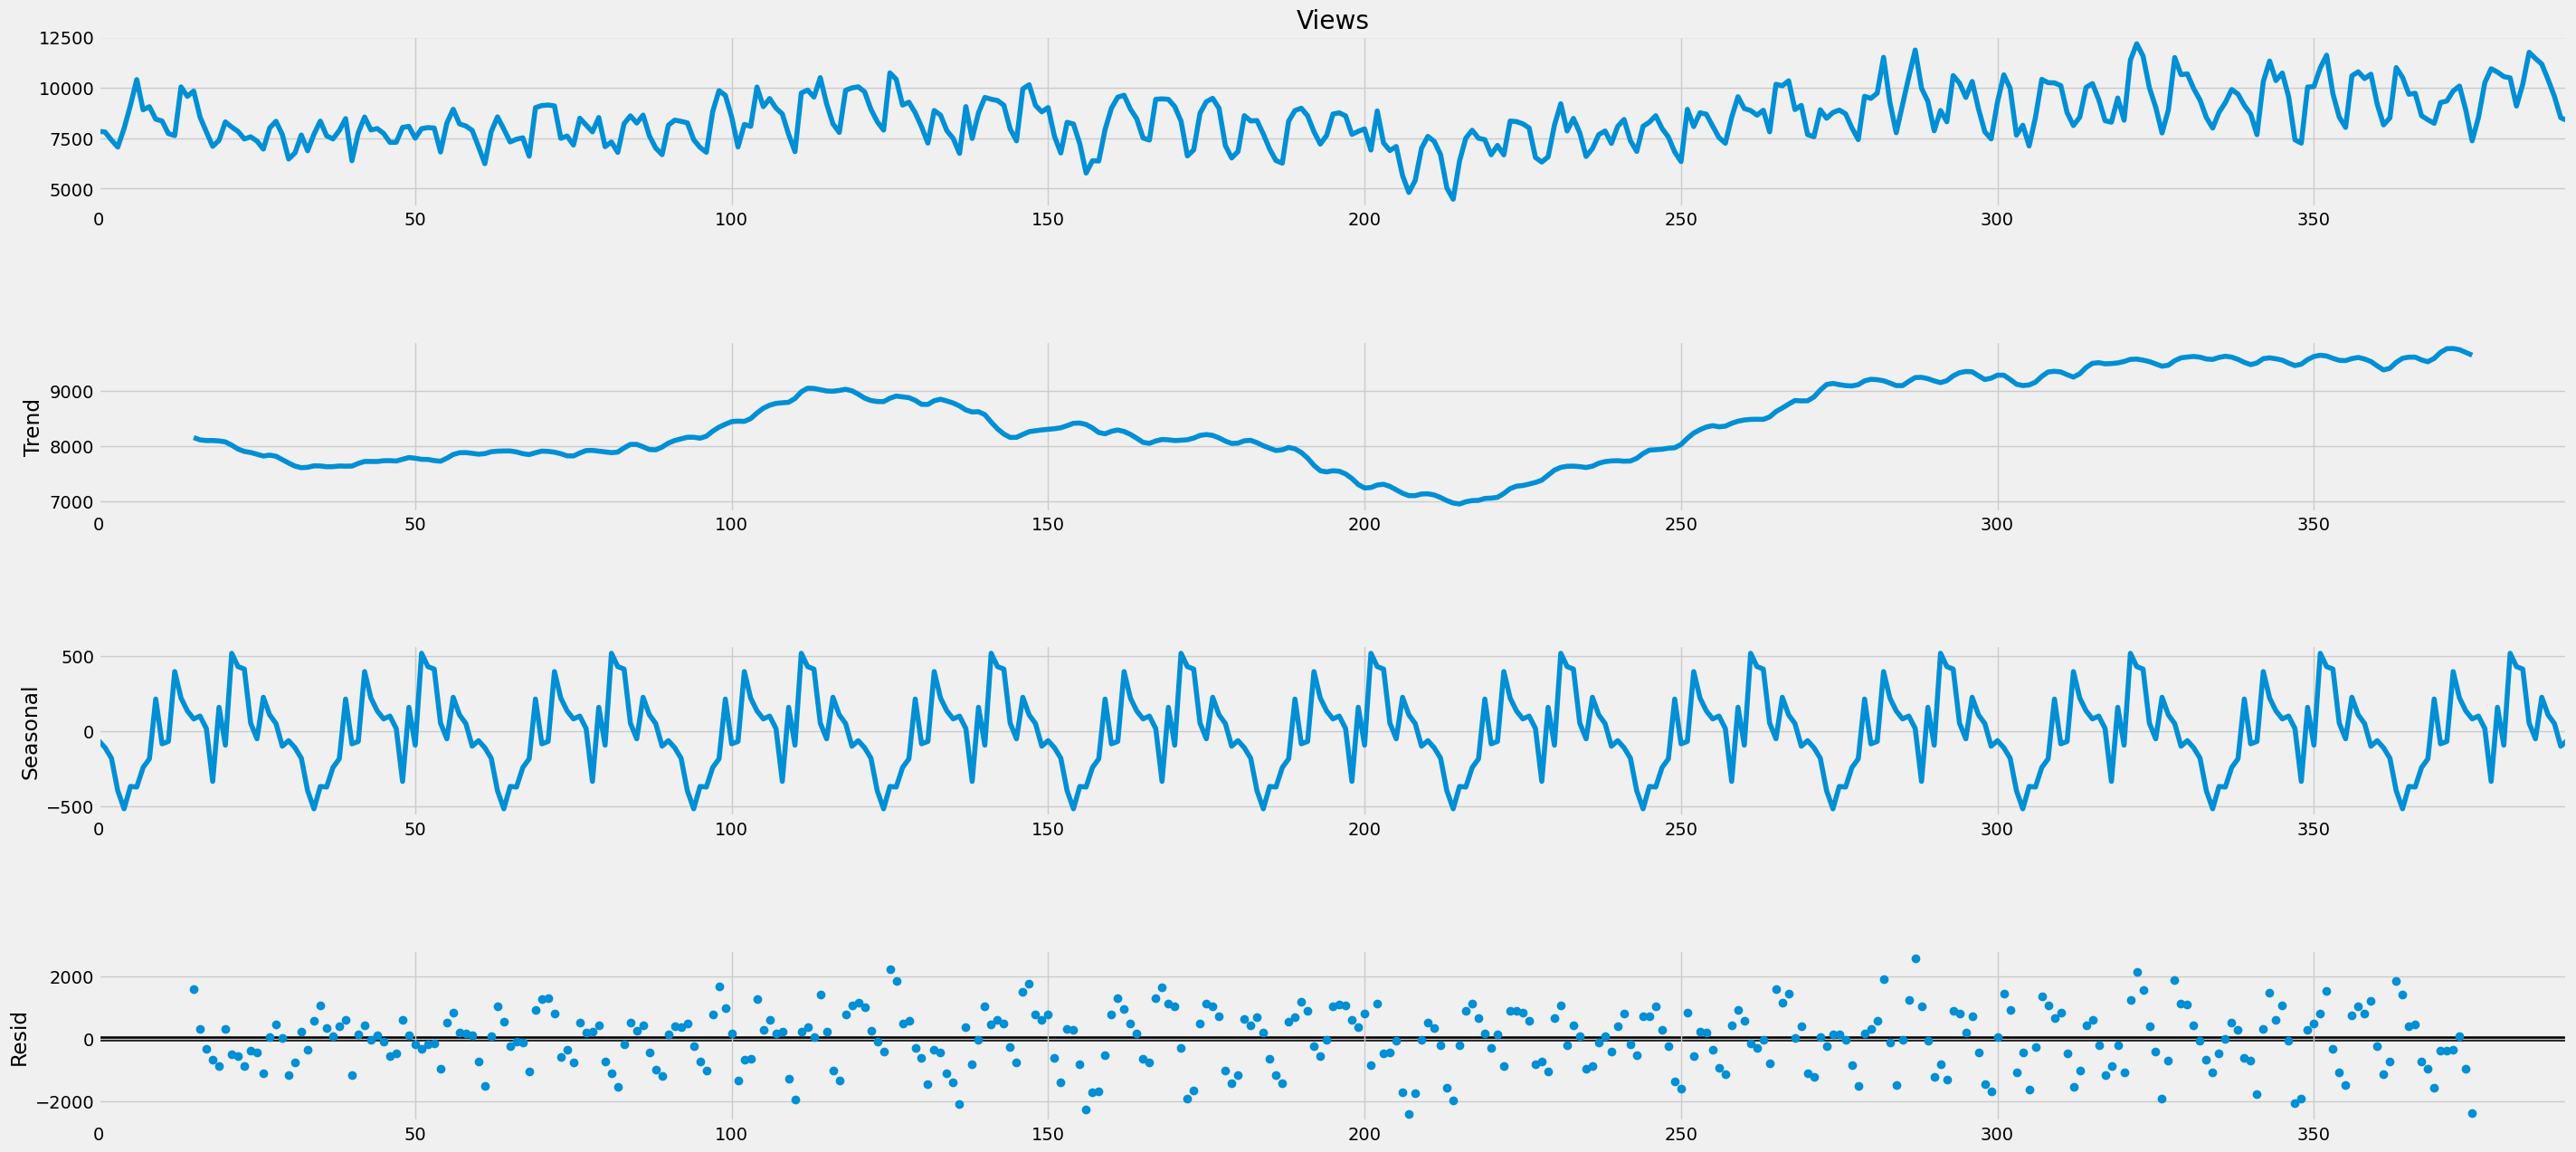

In [77]:
#Xem liệu tập dữ liệu của đã có là cố định hay theo mùa.
result = seasonal_decompose(data["Views"], model='additive', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(35, 15)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

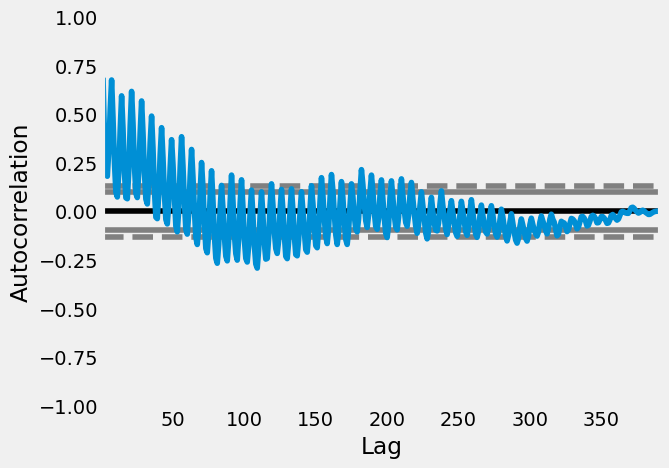

In [58]:
#Sử dụng mô hình ARIMA theo mùa (SARIMA) để dự báo lưu lượng truy cập trên trang web. 
#Trước khi sử dụng mô hình SARIMA, cần tìm các giá trị p, d và q.
#Vì dữ liệu không cố định nên giá trị của d là 1. 
#Để tìm giá trị của p và q, ta sử dụng biểu đồ tự tương quan và tự tương quan một phần:

pd.plotting.autocorrelation_plot(data["Views"])

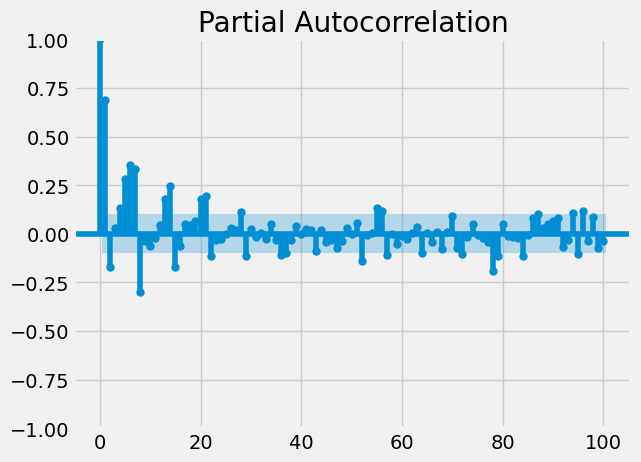

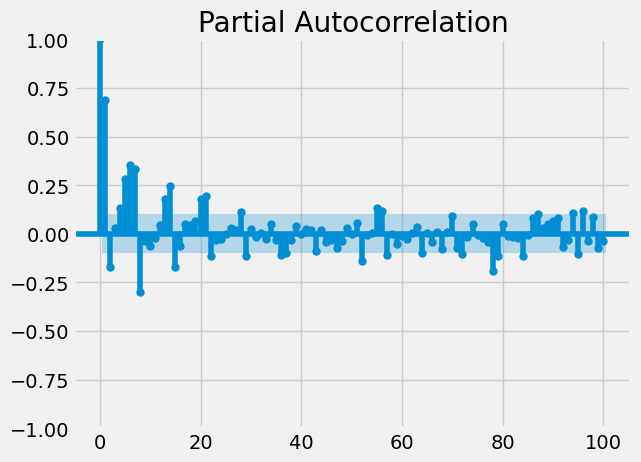

In [79]:
plot_pacf(data["Views"], lags = 100)

In [62]:
#Đào tạo mô hình SARIMA cho nhiệm vụ dự báo lưu lượng truy cập trang web:

p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data["Views"],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.354
Date:                            Sun, 01 Jan 2023   AIC                           6228.707
Time:                                    22:24:29   BIC                           6287.731
Sample:                                         0   HQIC                          6252.133
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7955      0.133      5.971      0.000       0.534       1.057
ar.L2         -0.7816      0.136   

In [72]:
#Dự báo lưu lượng truy cập trên trang web trong 100 ngày tới.
predictions = model.predict(len(data), len(data)+100)
print(predictions)

391     9862.560866
392    10764.483641
393    10721.995890
394     9837.168835
395     8752.502809
           ...     
487     9484.432690
488     9775.228874
489    10651.153650
490    11022.486589
491    10951.885973
Name: predicted_mean, Length: 101, dtype: float64


<AxesSubplot:>

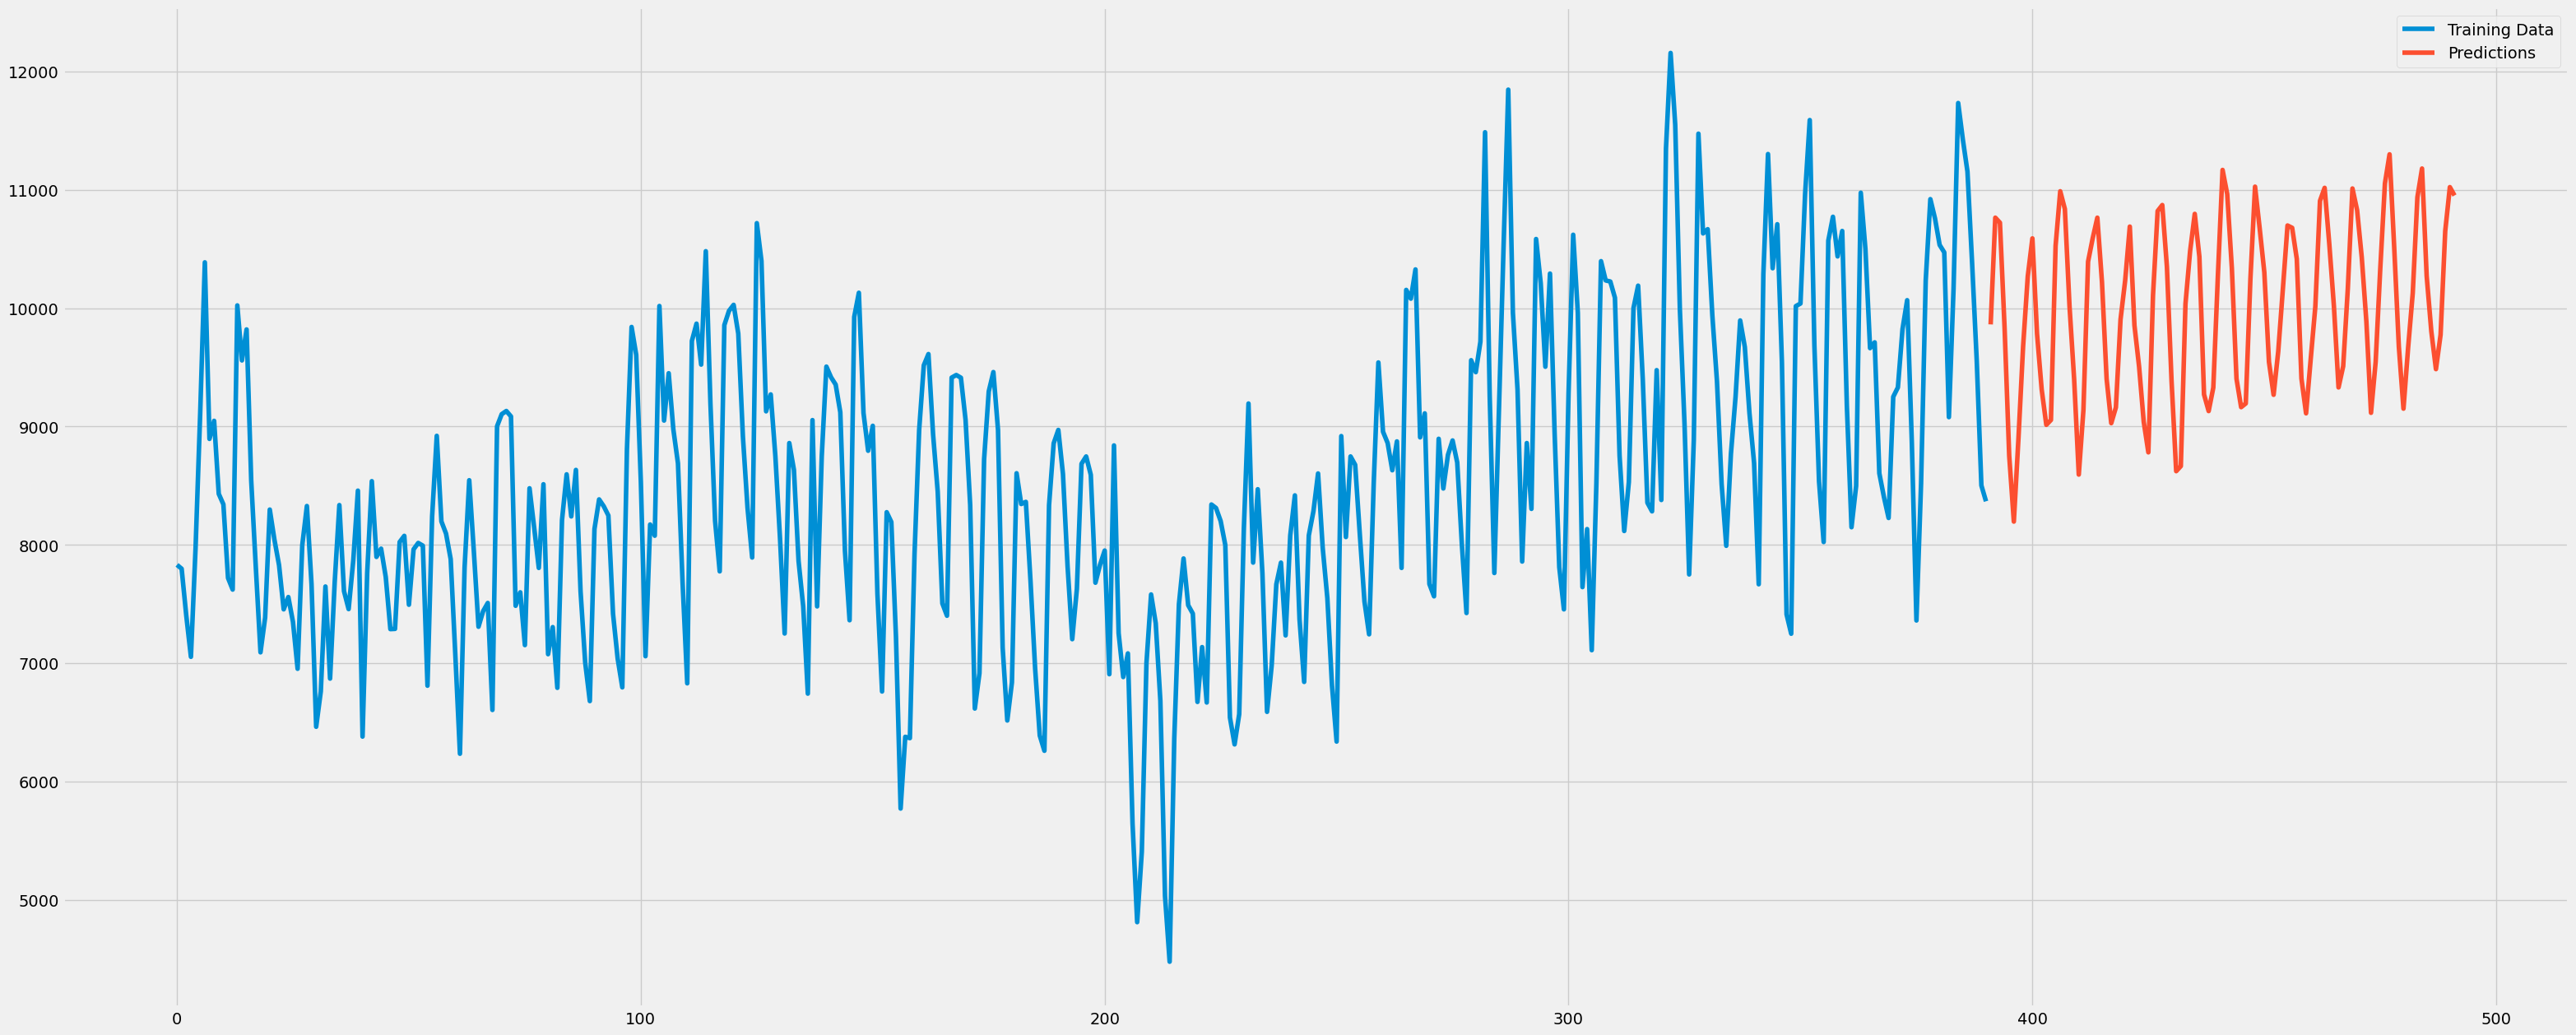

In [76]:
#Xuất ra lưu lượng truy cập trên trang web trong 100 ngày tới
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(35, 15))
predictions.plot(legend=True, label="Predictions")